# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


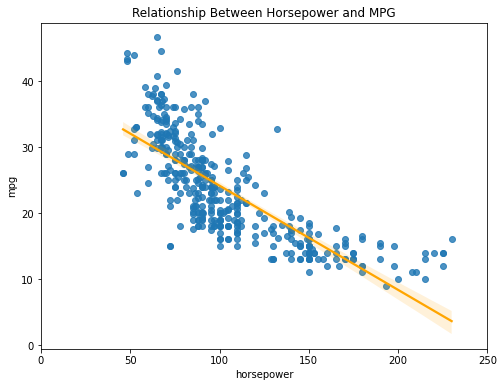

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
# call_on_students(1)

#### Answer: 

- This graph tells us that the minimum of the Cost (or Loss) function happens when the slope is about -.157, meaining that is the slope of the best fit line to use for our model


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
# call_on_students(1)

Gradient descent finds the gradient of the Cost function. Here it's negative so it takes a step in the positive direction (opp the gradient), the size of which is determined by the step size. It then repeats this process until the number of iterations is reached or the change in distance for each step falls below the threshold. 

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
# call_on_students(1)

#### Answer: 

- step size is how big the gradient descent steps in the direction opposite the gradient. If too big, it may overshoot. If too small, it may get stuck in a local minima or take too long to reach the absolute minima.
- steps move opposite to slope
- steps get smaller closer you get to 0 (gradient) b/c you are multiplying it by the gradient
- directly proportional to the size of the gradient
- Learning rate too small (take forever)
- Learning rate too large (might not find min)
- Learning rate is our constant of proportionality  -> proportion of gradient that we use to take our step
- Step size = Learning_rate * Gradient


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
# call_on_students(1)

#### Answer: 

- A logistic regression model is used for binary or categorical targets

- Technical: returns ln(y/(1-y)) -> log-odds                       
- Less Technical(.predict_proba): returns probabilities of X value being each class                      
- Less Technical 2 (.predict): returns class label based on the threshold (default is .5)

- It's different from linear regression b/c it is not predicting a linear set of predictions, it's finding a threshold
and probability that a given point is 0 or 1
- It is a parametric model b/c it has coefficients (weights). Coefficients are the parameters for log reg. Optimizing for best parameters which is coefficients in log reg


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
# call_on_students(1)

#### Answer: 

- Linear Regression Model is continuous whereas Logistic Regression is binary or categorical
- Log Reg less prone to noise than decision tree (means it is less prone to overfitting than decision tree)
- Logistic will probably work better out the gate (untuned) on class imbalance
- Decision Trees have less preprocessing work, no need to scale/normalize
- Logreg more sensitive to outliers than decision tree

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [14]:
# Train-test split
X = mpg_class.drop('target', axis=1)
y = mpg_class['target']

# Set test_size=0.33 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=42)

In [15]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [17]:
# Code to explore
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

In [53]:
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- class imbalance for target, 74% in class 0
- model-less basline, assuming we are answering majority for every case, would get us a 74% accuracy


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- - model-less basline, assuming we are answering majority for every case, would get us a 74% accuracy


#### Part 3: How accurate would that baseline be on test data?


In [18]:
# Code to find the answer
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- model-less basline, assuming we are answering majority for every case, would get us a 74% accuracy
- Dummy model always predict class (strategy = 'most_frequent')


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [19]:
# call_on_students(1)

#### Answer:

- Not enough data on 1's. Use some form of resampling, oversampling (SMOTE), or undersampling. In this case not enough data to undersample - normally never do this
- we should think about using an alternative metric (recall or precision or f1)
- class_weight hyperparameter (set to 'balanced' or manually assign weights)

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [20]:
# call_on_students(1)

In [21]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

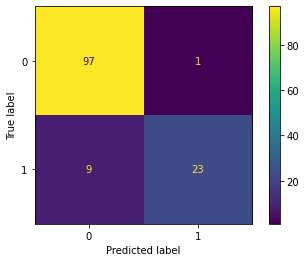

In [22]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [23]:
# call_on_students(1)

In [24]:
# Accuracy
accuracy_score(y_test, logreg.predict(X_test_scaled))

0.9230769230769231

In [25]:
# Precision
precision_score(y_test, logreg.predict(X_test_scaled))

0.9583333333333334

In [26]:
# Recall
recall_score(y_test, logreg.predict(X_test_scaled))

0.71875

In [27]:
# F1-Score
f1_score(y_test, logreg.predict(X_test_scaled))

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [28]:
# call_on_students(1)

In [29]:
# Calculate roc-auc
roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:,1])

0.9811862244897959

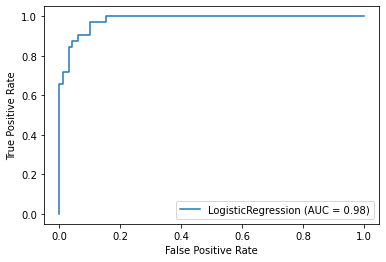

In [30]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [31]:
# call_on_students(1)

#### Answer:

- Based on the AUC our model is doing very well, mostly high scores for test data (unseen data).
- recall score is a bit low indicating more false negatives than potentially desired


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [32]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

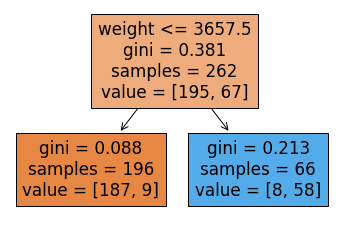

In [33]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

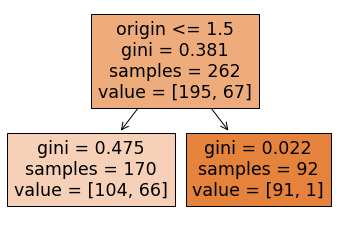

In [34]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [35]:
# call_on_students(1)

#### Answer:

- The Weight has done a better job b/c the total gini score of the tree is less than that of the Origin
- Data is partitioned  better in "weight"


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [36]:
# call_on_students(1)

In [76]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

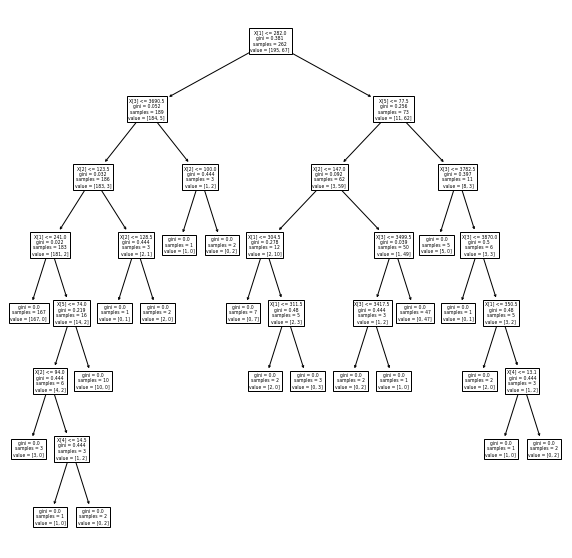

In [77]:
#Display Decision Tree
f, ax = plt.subplots(figsize=(10, 10))
plot_tree(dt, ax=ax);


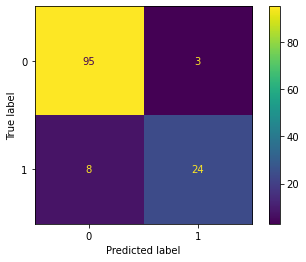

In [78]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test)

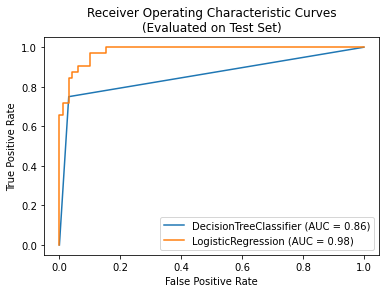

In [79]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [80]:
# call_on_students(1)

#### Answer:

-  The LogReg is better b/c AUC is higher
